Briefly discuss how you grouped the labels into two groups. Are there any limitations that could arise from the decisions you made when grouping the labels? Lets start by exploring how often each type occurs. 


Counting amount of specific labels in column:
 - Read file
 - Extract values from the column
 - Count occurrences

Result of function:
 - political: 	194518
 - fake: 	104883
 - satire: 	13160
 - reliable: 	218564
 - conspiracy: 	97314
 - unreliable: 	35332
 - bias: 	133232
 - clickbait: 	27412
 - hate: 	8779
 - junksci: 	14040


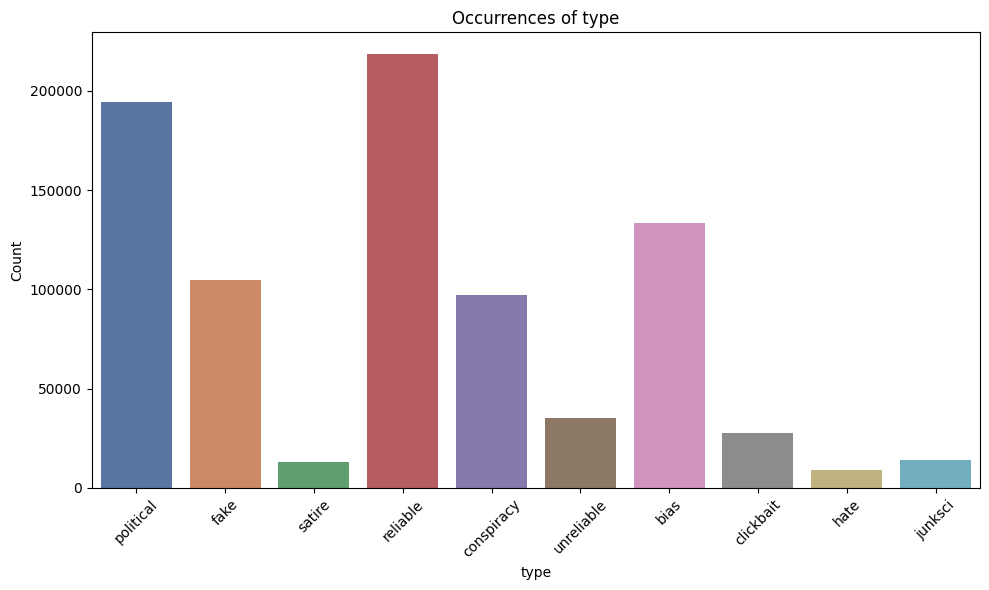

In [2]:
import warnings
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

file_path = "/Users/simonhvidtfeldt/Group_project/995,000_rows.csv"  # File to read
column_name = "type"  # Column to search
labels_to_search = ["fake", "satire", "bias", "conspiracy", "state", "junksci", "hate", "clickbait", "unreliable", "political", "reliable"]  # List of labels to search for

print("Counting amount of specific labels in column:")

def count_column_values(file_path, column_name, labels_to_search):
    df = pd.read_csv(file_path)
    print(" - Read file")

    # Check if the column exists
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    # Extract values from the column
    values = df[column_name].dropna().astype(str)  # Convert to string & drop NaN values
    print(" - Extract values from the column")

    # Filter the values based on the labels_to_search list
    filtered_values = [value for value in values if value in labels_to_search]
    
    # Count occurrences of the filtered values
    value_counts = Counter(filtered_values)
    print(" - Count occurrences")

    print("\nResult of function:")
    for value, count in value_counts.items():
        print(f" - {value}: \t{count}")

    # Plotting the result
    plot_data = pd.DataFrame(value_counts.items(), columns=[column_name, 'Count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y='Count', data=plot_data, palette="deep")
    plt.xticks(rotation=45)  
    plt.title(f"Occurrences of {column_name}")
    plt.xlabel(f"{column_name}")
    plt.ylabel("Count")
    plt.tight_layout()  
    plt.show()

# Example usage
count_column_values(file_path, column_name, labels_to_search)



FakeNews: 0, TrueNews: 1

Fake News: Fake  
Satire: Remove  
Extreme Bias: Fake  
Conspiracy Theory: Remove  
State News: Remove  
Junk Science: Remove  
Hate News: Remove  
Clickbait: True  
Proceed with Caution: Remove  
Political: True  
Credible: True  

---

CATEGORY EXPLANATIONS

Fake News:  
Labeled as fake due to its misleading or intentionally deceptive nature.  

Satire:  
Satire is highly context-dependent and, when taken out of context, can lead to misunderstandings in both directions.  

Extreme Bias:  
Due to its reliance on highly questionable foundations, often associated with propaganda or fake news, extreme bias is classified as fake news.  

Conspiracy Theory:  
Conspiracy theories are based on non-scientific claims. While they may contain some true elements, they often mix verified information with misinformation, making them unreliable.  

State News:  
Excluded due to the lack of data or counts, making it an indifferent feature.  

Junk Science:  
Based on non-scientific theories that, in a binary classification system, would be considered fake. However, some theories may be difficult to prove scientifically. The non-traditional scientific methods used might overlook truths, such as in topics like spirituality.  

Hate News:  
(To be analyzed using `most.common` for further classification.)  

Clickbait:  
Clickbait often originates from credible sources but presents information in a misleading, exaggerated way. While it is not outright false, it angles the narrative in a way that can distort reality without technically spreading fake news.  

Proceed with Caution:  
This category contains both fake and potentially true content but requires further verification. By definition, it presents hypotheses that are not yet verified and therefore cannot be conclusively categorized as true or false.  

Political:  
Generally derived from verified sources of factual information but often framed to align with a particular political ideology. It does not cross the threshold into fake news.  

Credible:  
Adheres to ethical journalistic standards, ensuring thorough source verification before publication.  

---

Kig på `most.common` for Hate News.


 - Read file
 - Extract values from the column
 - Count occurrences

Result of function:
 - political: 	194518
 - fake: 	104883
 - reliable: 	218564
 - bias: 	133232
 - clickbait: 	27412
 - junksci: 	14040


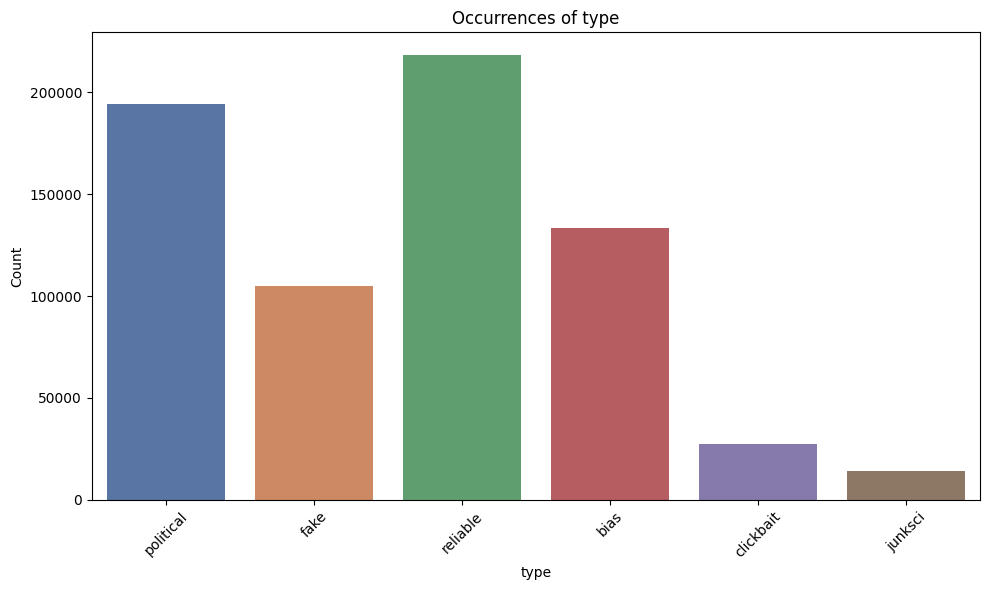

In [3]:
"""
Count after removing non relevant types:
"""

import warnings
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

file_path = "/Users/simonhvidtfeldt/Group_project/995,000_rows.csv"  # File to read
column_name = "type"  # Column to search
labels_to_search = ["fake", "bias", "clickbait", "political", "reliable"]  # List of labels to search for

count_column_values(file_path, column_name, labels_to_search)


Great. Now lets see how the distrubution of "Fake" and "True" looks like, when we add the count of each type together, for their respective category. 

True count (political, reliable): 440494
False count (fake, bias): 238115


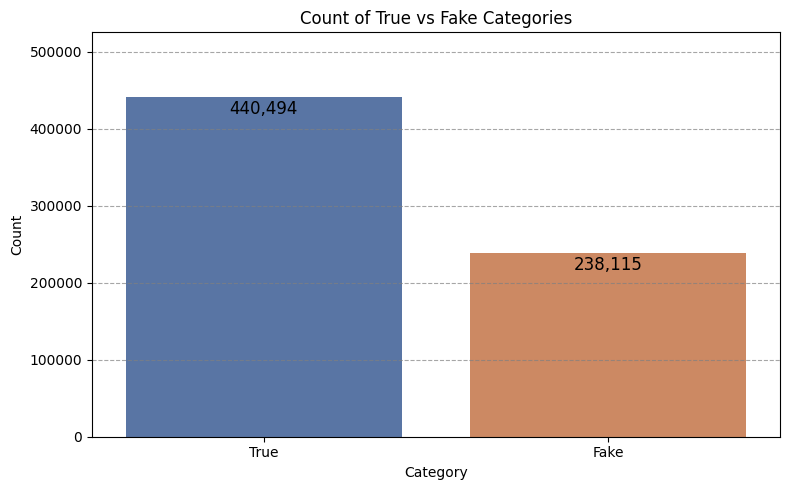

In [22]:
import warnings
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

file_path = "/Users/simonhvidtfeldt/Group_project/995,000_rows.csv"  # File to read
column_name = "type"  # Column to search

# Function to categorize and sum counts based on labels
def categorize_and_count(file_path, column_name):
    # Define the categories and their corresponding labels
    true_labels = ["political", "reliable", "clickbait"]
    false_labels = ["fake", "bias"]
    
    # Read the file
    df = pd.read_csv(file_path)

    # Extract values from the column and drop NaN
    values = df[column_name].dropna().astype(str)  # Convert to string & drop NaN values
    
    # Count occurrences of each label
    value_counts = Counter(values)

    # Calculate the sum of counts for True and False categories
    true_count = sum([value_counts[label] for label in true_labels if label in value_counts])
    false_count = sum([value_counts[label] for label in false_labels if label in value_counts])

    # Print the counts for True and False categories
    print(f"True count (political, reliable): {true_count}")
    print(f"False count (fake, bias): {false_count}")
    
    # Prepare data for plotting
    plot_data = pd.DataFrame({"Category": ["True", "Fake"], "Count": [true_count, false_count]})

    # Plotting the result
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x="Category", y="Count", data=plot_data, palette="deep")

    # Add horizontal lines for every 100,000 count
    y_max = max(true_count, false_count)  # Get max count
    for y in np.arange(100000, y_max + 100000, 100000):
        plt.axhline(y=y, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)

    # Add count values on top of each bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height() - (y_max * 0.05), 
                f"{int(p.get_height()):,}", ha="center", fontsize=12, color="black")

    # Labels and title
    plt.title("Count of True vs Fake Categories")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Example usage: Call the function to categorize and plot the data
categorize_and_count(file_path, column_name)


Based on the way we have decided to categorize our data, we can see that we have a surplus of "True" articles in the data we want to analyze. We have to keep this in mind when training and evaluating our model. 

---

### BONUS ANALYSIS 

This creates a file where the domains are listed, along side the labels. For each domain there is a count of how many times a given label is associated with that website. 

In [7]:
import warnings
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific warnings. I got tired of the warnings so Chat said i could do this to get rid of them
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

file_path = "/Users/simonhvidtfeldt/Group_project/995,000_rows.csv"  
domain_column = "domain"  
label_column = "type"    
labels = ["fake", "satire", "bias", "conspiracy", "state", "junksci", "hate", "clickbait", "unreliable", "political", "reliable"]
output_file = "domain_label_counts.csv"  

def count_labels_by_domain(file_path, domain_column, label_column, labels, output_file):
    # Read the file
    df = pd.read_csv(file_path, dtype={domain_column: str, label_column: str})
    print(" - Read file")

    # Check if columns exist
    if domain_column not in df.columns or label_column not in df.columns:
        print(f"Error: Columns '{domain_column}' or '{label_column}' not found in the CSV file.")
        return

    # Group by domain and label, count occurrences
    result_df = df.groupby([domain_column, label_column]).size().unstack(fill_value=0)

    # Ensure all labels are present in the DataFrame
    for label in labels:
        if label not in result_df.columns:
            result_df[label] = 0  # Add missing label columns with 0 values

    # Reorder columns to match the provided label list
    result_df = result_df[labels]

    # Save the DataFrame to a CSV file
    result_df.to_csv(output_file, index=True)
    print(f"\nOutput saved to: {output_file}")

    return result_df

# Call the function
result_df = count_labels_by_domain(file_path, domain_column, label_column, labels, output_file)



 - Read file

Output saved to: domain_label_counts.csv
